In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
data = pd.read_csv('data.csv')

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [13]:
data.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [14]:
data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

--> Encoding the categorical data

In [19]:
# Encoding the Fuel_type column

data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

data.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1}}, inplace=True)

data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

C:\Users\malha\AppData\Local\Temp\ipykernel_24992\55108086.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1}}, inplace=True)
C:\Users\malha\AppData\Local\Temp\ipykernel_24992\55108086.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


In [20]:
data.Fuel_Type

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64

In [23]:
data.Seller_Type

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    1
298    1
299    1
300    1
Name: Seller_Type, Length: 301, dtype: int64

In [24]:
data.Transmission

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Transmission, Length: 301, dtype: int64

In [25]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


In [26]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,1,0,0
297,brio,2015,4.00,5.90,60000,0,1,0,0
298,city,2009,3.35,11.00,87934,0,1,0,0
299,city,2017,11.50,12.50,9000,1,1,0,0


In [27]:
data.Seller_Type.value_counts()

Seller_Type
1    195
0    106
Name: count, dtype: int64

--> Creating the independent and dependent variable dataset

In [28]:
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)

Y= data['Selling_Price']

In [30]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,1,0,0
1,2013,9.54,43000,1,1,0,0
2,2017,9.85,6900,0,1,0,0
3,2011,4.15,5200,0,1,0,0
4,2014,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,1,0,0
297,2015,5.90,60000,0,1,0,0
298,2009,11.00,87934,0,1,0,0
299,2017,12.50,9000,1,1,0,0


In [31]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

--> Splitting into training and testing data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

--> Linear Regression Model Training

In [49]:
linear_model = LinearRegression()

In [50]:
linear_model.fit(X_train, Y_train)

LinearRegression()

--> Linear Model Evaluation on training data

In [57]:
# Prediction on training data

linear_training_data_prediction = linear_model.predict(X_train)

In [67]:
# R squared Error

linear_error_score_training = metrics.r2_score(Y_train, linear_training_data_prediction)

linear_error_score_training

0.8799451660493699

--> Visualizing the actual and the predicted prices for Linear Regression Model

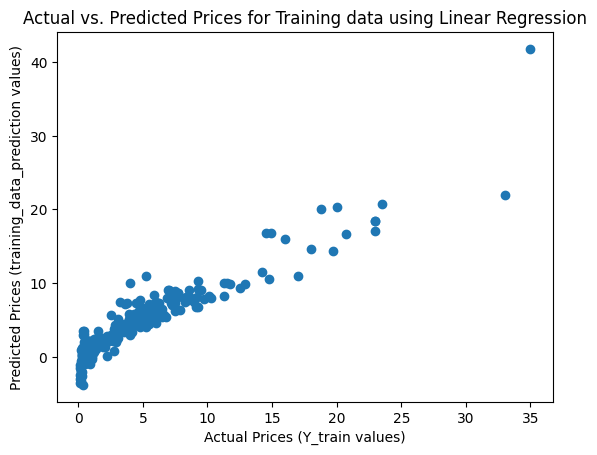

In [63]:
plt.scatter(Y_train, linear_training_data_prediction)
plt.xlabel('Actual Prices (Y_train values)')
plt.ylabel('Predicted Prices (linear_training_data_prediction values)')
plt.title('Actual vs. Predicted Prices for Training data using Linear Regression')
plt.show()

--> Linear Model Evaluation for testing data

In [60]:
linear_testing_data_prediction = linear_model.predict(X_test)

In [68]:
linear_error_score_testing = metrics.r2_score(Y_test, linear_testing_data_prediction)

linear_error_score_testing

0.8365766715026473

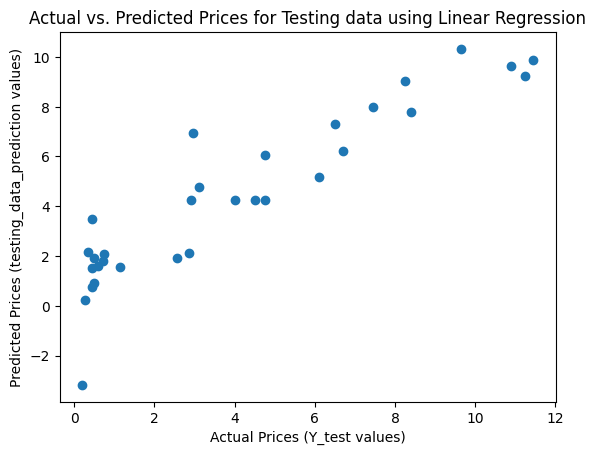

In [64]:
plt.scatter(Y_test, linear_testing_data_prediction)
plt.xlabel('Actual Prices (Y_test values)')
plt.ylabel('Predicted Prices (linear_testing_data_prediction values)')
plt.title('Actual vs. Predicted Prices for Testing data using Linear Regression')
plt.show()

--> Lasso Regression Model Training

In [55]:
lasso_model = Lasso()

In [56]:
lasso_model.fit(X_train, Y_train)

Lasso()

--> Lasso Model Evaluation on training data

In [66]:
lasso_training_data_prediction = lasso_model.predict(X_train)

In [69]:
lasso_error_score_training = metrics.r2_score(Y_train, lasso_training_data_prediction)

lasso_error_score_training

0.8427856123435795

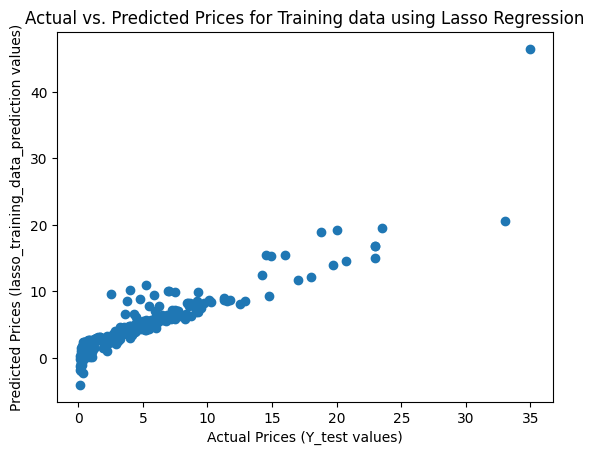

In [73]:
plt.scatter(Y_train, lasso_training_data_prediction)
plt.xlabel('Actual Prices (Y_test values)')
plt.ylabel('Predicted Prices (lasso_training_data_prediction values)')
plt.title('Actual vs. Predicted Prices for Training data using Lasso Regression')
plt.show()

In [71]:
lasso_testing_data_prediction = lasso_model.predict(X_test)

In [72]:
lasso_error_score_testing = metrics.r2_score(Y_test, lasso_testing_data_prediction)

lasso_error_score_testing

0.8709167941173201

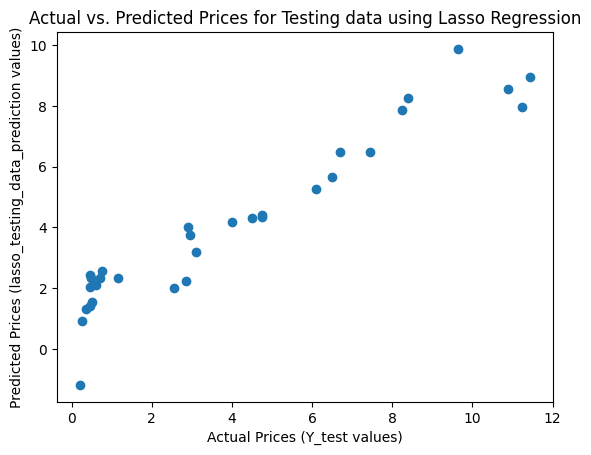

In [75]:
plt.scatter(Y_test, lasso_testing_data_prediction)
plt.xlabel('Actual Prices (Y_test values)')
plt.ylabel('Predicted Prices (lasso_testing_data_prediction values)')
plt.title('Actual vs. Predicted Prices for Testing data using Lasso Regression')
plt.show()

--> Predicting a single value

In [77]:
prediction = linear_model.predict(X_test.iloc[1].values.reshape(1, -1))

prediction

C:\Users\malha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.77165673])